# Proyek Analisis Data: [Bike Sharing]
- **Nama:** Sultan Rafi Lukmanul Hakim
- **Email:** rafilhsultan@gmail.com
- **ID Dicoding:** sultanrafi12

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Berapa rata-rata peminjaman sepeda pada minggu pertama bulan Januari 2011 dan bagaimana trennya?
- Pertanyaan 2 : Bagaimana perbandingan tren peminjaman sepeda pada setiap awal tahun? (berdasarkan 1 Januari 2011 dan 1 Januari 2012)
- Pertanyaan 3 : Bagaimana pengaruh kecepatan angin terhadap total peminjaman sepeda untuk semua pengguna (Untuk bulan Januari - Desember 2012)?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Membuat salinan data day.csv agar tidak mengganggu data aslinya

In [5]:
day_bike_data = day_df.copy()
day_bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
day_bike_data.rename(columns={'instant': 'no', 'dteday': 'date', 'yr': 'year', 'mnth':'month', 'weekday': 'week_day', 'workingday': 'working_day', 'windspeed': 'wind_speed', 'cnt': 'total'}, inplace=True)
day_bike_data.head()

,no,date,season,year,month,holiday,week_day,working_day,weathersit,temp,atemp,hum,wind_speed,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengganti nama kolom agar lebih mudah dianalisis

In [7]:
day_bike_data.isna().sum()

no             0
date           0
season         0
year           0
month          0
holiday        0
week_day       0
working_day    0
weathersit     0
temp           0
atemp          0
hum            0
wind_speed     0
casual         0
registered     0
total          0
dtype: int64

Tidak ada missing value

In [8]:
day_bike_data.duplicated().sum()

0

Tidak ada data yang duplikat pada data day

In [9]:
day_bike_data.describe()

,no,season,year,month,holiday,week_day,working_day,weathersit,temp,atemp,hum,wind_speed,casual,registered,total
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan nilai statistiknya sudah sesuai

In [10]:
day_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   no           731 non-null    int64  
 1   date         731 non-null    object 
 2   season       731 non-null    int64  
 3   year         731 non-null    int64  
 4   month        731 non-null    int64  
 5   holiday      731 non-null    int64  
 6   week_day     731 non-null    int64  
 7   working_day  731 non-null    int64  
 8   weathersit   731 non-null    int64  
 9   temp         731 non-null    float64
 10  atemp        731 non-null    float64
 11  hum          731 non-null    float64
 12  wind_speed   731 non-null    float64
 13  casual       731 non-null    int64  
 14  registered   731 non-null    int64  
 15  total        731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Melihat jenis tipe data dan banyaknya data pada tabel data day

#### Membuat salinan data hour.csv agar tidak mengganggu data aslinya

In [11]:
hour_bike_data = hour_df.copy()
hour_bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Mengubah nama kolom agar lebih mudah dibaca

In [12]:
hour_bike_data.rename(columns={'instant': 'no', 'dteday': 'date', 'yr': 'year', 'mnth':'month', 'hr': 'hour', 'weekday': 'week_day', 'workingday': 'working_day', 'windspeed': 'wind_speed', 'cnt': 'total'}, inplace=True)
hour_bike_data.head()

,no,date,season,year,month,hour,holiday,week_day,working_day,weathersit,temp,atemp,hum,wind_speed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
hour_bike_data.isna().sum()

no             0
date           0
season         0
year           0
month          0
hour           0
holiday        0
week_day       0
working_day    0
weathersit     0
temp           0
atemp          0
hum            0
wind_speed     0
casual         0
registered     0
total          0
dtype: int64

##### Tidak ada missing value

In [14]:
hour_bike_data.duplicated().sum()

0

##### Tidak ada duplicate value

In [15]:
hour_bike_data.describe()

,no,season,year,month,hour,holiday,week_day,working_day,weathersit,temp,atemp,hum,wind_speed,casual,registered,total
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan nilai statistik untuk data hour sudah sesuai

In [16]:
hour_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   no           17379 non-null  int64  
 1   date         17379 non-null  object 
 2   season       17379 non-null  int64  
 3   year         17379 non-null  int64  
 4   month        17379 non-null  int64  
 5   hour         17379 non-null  int64  
 6   holiday      17379 non-null  int64  
 7   week_day     17379 non-null  int64  
 8   working_day  17379 non-null  int64  
 9   weathersit   17379 non-null  int64  
 10  temp         17379 non-null  float64
 11  atemp        17379 non-null  float64
 12  hum          17379 non-null  float64
 13  wind_speed   17379 non-null  float64
 14  casual       17379 non-null  int64  
 15  registered   17379 non-null  int64  
 16  total        17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

##### Mengganti tipe data kolom 'date' menjadi datetime pada data day

In [17]:
day_bike_data['date'] = pd.to_datetime(day_bike_data['date'])
day_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   no           731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    int64         
 3   year         731 non-null    int64         
 4   month        731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   week_day     731 non-null    int64         
 7   working_day  731 non-null    int64         
 8   weathersit   731 non-null    int64         
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  wind_speed   731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  total        731 non-null    int64         
dtypes: datet

#### Mengganti tipe data pada kolom 'date' untuk tabel hour

In [18]:
hour_bike_data['date'] = pd.to_datetime(hour_bike_data['date'])
hour_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   no           17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  int64         
 3   year         17379 non-null  int64         
 4   month        17379 non-null  int64         
 5   hour         17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   week_day     17379 non-null  int64         
 8   working_day  17379 non-null  int64         
 9   weathersit   17379 non-null  int64         
 10  temp         17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  hum          17379 non-null  float64       
 13  wind_speed   17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  tota

#### Mengganti beberapa detail pada data day

In [19]:
day_bike_data['month'] = day_bike_data['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_bike_data['season'] = day_bike_data['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_bike_data['week_day'] = day_bike_data['week_day'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_bike_data['weathersit'] = day_bike_data['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
day_bike_data['working_day'] = day_bike_data['working_day'].map({
    0:  'Weekend/Holiday', 
    1:  'Not Weekend/Holiday'
})
day_bike_data['year'] = day_bike_data['year'].map({
    0:  2011, 
    1:  2012
})
day_bike_data['holiday'] = day_bike_data['holiday'].map({
    0: 'No',
    1: 'Yes'
})



In [20]:
day_bike_data.head()

,no,date,season,year,month,holiday,week_day,working_day,weathersit,temp,atemp,hum,wind_speed,casual,registered,total
0,1,2011-01-01,Spring,2011,Jan,No,Sat,Weekend/Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sun,Weekend/Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Mon,Not Weekend/Holiday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tue,Not Weekend/Holiday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wed,Not Weekend/Holiday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Mengganti beberapa detail pada data hour

In [21]:
hour_bike_data['month'] = hour_bike_data['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_bike_data['season'] = hour_bike_data['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_bike_data['week_day'] = hour_bike_data['week_day'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_bike_data['weathersit'] = hour_bike_data['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
hour_bike_data['working_day'] = hour_bike_data['working_day'].map({
    0:  'Weekend/Holiday', 
    1:  'Not Weekend/Holiday'
})
hour_bike_data['year'] = hour_bike_data['year'].map({
    0:  2011, 
    1:  2012
})
hour_bike_data['holiday'] = hour_bike_data['holiday'].map({
    0: 'No',
    1: 'Yes'
})

In [22]:
hour_bike_data.head()

,no,date,season,year,month,hour,holiday,week_day,working_day,weathersit,temp,atemp,hum,wind_speed,casual,registered,total
0,1,2011-01-01,Spring,2011,Jan,0,No,Sat,Weekend/Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No,Sat,Weekend/Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No,Sat,Weekend/Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No,Sat,Weekend/Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No,Sat,Weekend/Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore 

In [23]:
hour_bike_data.head()

,no,date,season,year,month,hour,holiday,week_day,working_day,weathersit,temp,atemp,hum,wind_speed,casual,registered,total
0,1,2011-01-01,Spring,2011,Jan,0,No,Sat,Weekend/Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No,Sat,Weekend/Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No,Sat,Weekend/Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No,Sat,Weekend/Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No,Sat,Weekend/Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [24]:
day_bike_data.head()

,no,date,season,year,month,holiday,week_day,working_day,weathersit,temp,atemp,hum,wind_speed,casual,registered,total
0,1,2011-01-01,Spring,2011,Jan,No,Sat,Weekend/Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sun,Weekend/Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Mon,Not Weekend/Holiday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tue,Not Weekend/Holiday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wed,Not Weekend/Holiday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
day_bike_data.groupby(by='month').agg({
    'total': ['max', 'min', 'mean', 'sum']
})

total                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Melihat statistik deskriptif untuk peminjaman sepeda berdasarkan bulan untuk seluruh pengguna

In [26]:
hour_bike_data.groupby(by='season').agg({
    'casual': ['max', 'min', 'mean', 'sum']
})

casual                       
          max min       mean     sum
season                              
Fall      350   0  50.287144  226091
Spring    367   0  14.290901   60622
Summer    361   0  46.160581  203522
Winter    362   0  30.666824  129782

Melihat jumlah peminjaman untuk jenis pelanggan 'casual' berdasarkan musim (berdasarkan data hour)

In [27]:
hour_bike_data.groupby(by='holiday').agg({
    'total': ['max', 'min', 'mean', 'sum']
})

total                        
          max min       mean      sum
holiday                              
No        977   1  190.42858  3214244
Yes       712   1  156.87000    78435

Jumlah seluruh peminjaman berdasarkan hari libur atau tidak

In [28]:
day_bike_data.groupby(by='weathersit').agg({
    'total': ['max', 'min', 'mean', 'sum']
})

total                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Melihat statistik seluruh peminjaman berdasarkan keadaan cuaca (dari data harian)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa rata-rata peminjaman sepeda pada minggu pertama bulan Januari 2011 dan bagaimana trennya?

In [29]:
# Menseleksi data untuk minggu pertama bulan Januari 2011
start_date = '2011-01-01'
end_date = '2011-01-07'
selected_data = day_bike_data[(day_bike_data['date'] >= start_date) & (day_bike_data['date'] <= end_date)]

# Menghitung rata-rata peminjaman sepeda
average_rentals = selected_data['total'].mean()

print(f"Rata-rata peminjaman sepeda pada minggu pertama bulan Januari 2011: {average_rentals:.2f} peminjaman")

Rata-rata peminjaman sepeda pada minggu pertama bulan Januari 2011: 1344.71 peminjaman


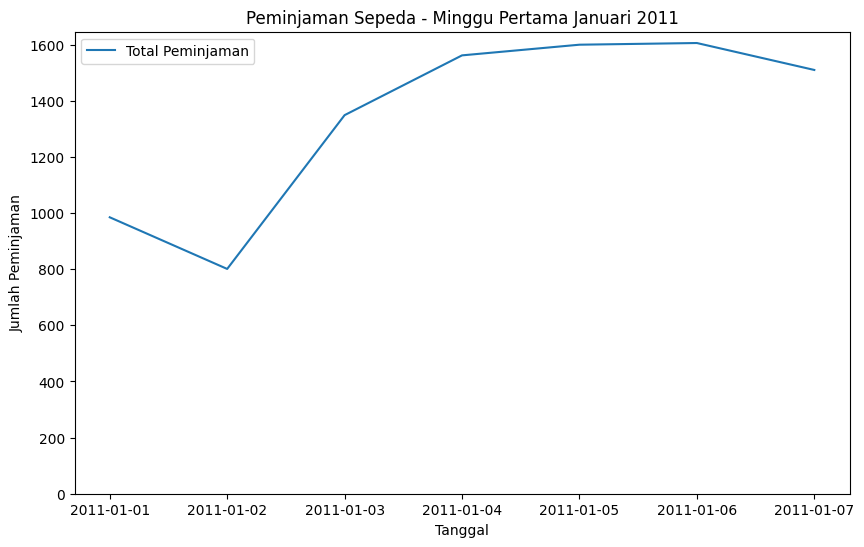

In [30]:
# Membuat visualisasi
plt.figure(figsize=(10, 6))
plt.plot(selected_data['date'], selected_data['total'], label='Total Peminjaman')
plt.title('Peminjaman Sepeda - Minggu Pertama Januari 2011')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.ylim(0)
plt.legend()
plt.show()

### Pertanyaan 2: Bagaimana perbandingan tren peminjaman sepeda pada setiap awal tahun 2011 dan 2012? (berdasarkan harian 1 Januari)

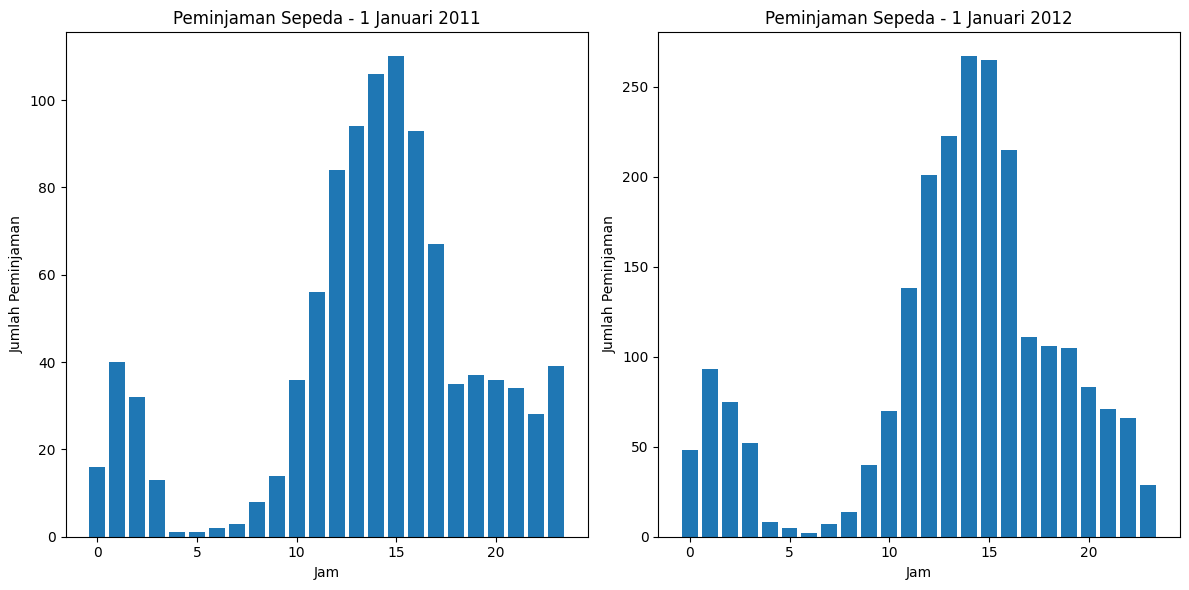

In [31]:
date_2011 = '2011-01-01'
data_2011 = hour_bike_data[hour_bike_data['date'] == date_2011]

date_2012 = '2012-01-01'
data_2012 = hour_bike_data[hour_bike_data['date'] == date_2012]

# Membuat visualisasi untuk tanggal 1 Januari 2011
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(data_2011['hour'], data_2011['total'])
plt.title('Peminjaman Sepeda - 1 Januari 2011')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')

# Membuat visualisasi untuk tanggal 1 Januari 2012
plt.subplot(1, 2, 2)
plt.bar(data_2012['hour'], data_2012['total'])
plt.title('Peminjaman Sepeda - 1 Januari 2012')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')

plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana pengaruh kecepatan angin terhadap total peminjaman sepeda untuk semua pengguna (Untuk bulan Januari - Desember 2012)?

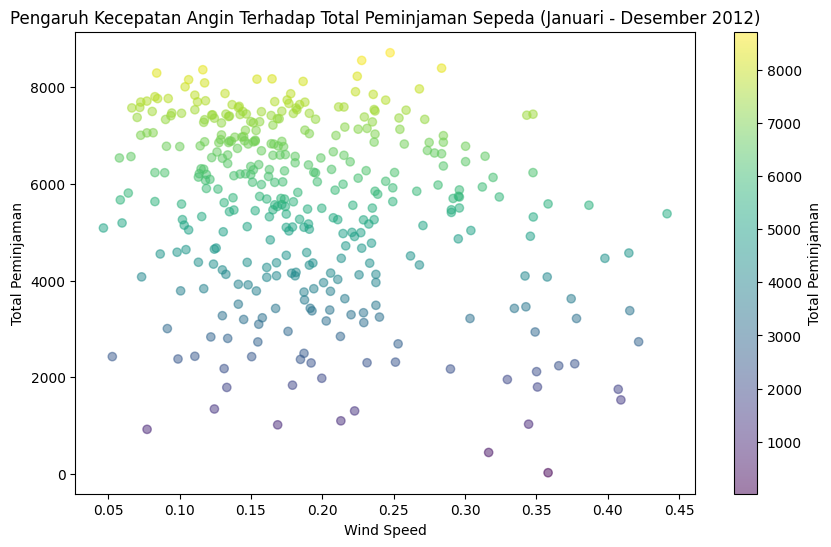

In [32]:
start_date = '2012-01-01'
end_date = '2012-12-31'
selected_data = day_bike_data[(day_bike_data['date'] >= start_date) & (day_bike_data['date'] <= end_date)]

# Membuat scatter plot 
plt.figure(figsize=(10, 6))
scatter = plt.scatter(selected_data['wind_speed'], selected_data['total'], c=selected_data['total'], cmap='viridis', alpha=0.5, label='Data Peminjaman Sepeda')
plt.title('Pengaruh Kecepatan Angin Terhadap Total Peminjaman Sepeda (Januari - Desember 2012)')
plt.xlabel('Wind Speed')
plt.ylabel('Total Peminjaman')

cbar = plt.colorbar(scatter)
cbar.set_label('Total Peminjaman')


plt.show()

## Conclusion

- Conclution pertanyaan 1 : Dapat kita lihat bahwa untuk hasil perhitungan terhadap rata-rata penjualan di minggu pertama bulan Januari 2011 adalah sebesar 1344.71 peminjaman atau jika dibulatkan sekitar 1345 peminjaman. Dari hasil visualisasi data juga terlihat total peminjaman fluktuaktif/naik turun. Peminjaman paling sedikit terdapat pada tanggal 2 Januari 2011 dan peminjaman paling banyak pada tanggal 6 Januari 2011 untuk minggu pertama.

- Conclution pertanyaan 2 : Dari hasil visualisasi dapat disimpulkan bahwa jumlah peminjaman pada tanggal 1 Januari 2011 dan 1 Januari 2012 cenderung sama, terutama pada rentang waktu tertentu. Untuk peminjaman paling sedikit pada 1 Januari 2011 berada di sekitar jam 4 - 7 dan untuk peminjaman paling banyak berada pada jam 11 - 16. Begitu juga pada tanggal 1 Januari 2012.

- Conclution pertanyaan 3 : Berdasarkan hasil scatter plot dapat dilihat bahwa jumlah peminjaman di bulan Januari - Desember 2012 cukup berpengaruh. Dari grafik terlihat bahwa pada rentang kecepatan angin antara 0.6 - 0.32 terdapat peningkatan jumlah peminjaman yang signifikan